In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# hide warnings
import warnings
warnings.filterwarnings('ignore')

## EDA

In [2]:
df = pd.read_csv("train.csv")
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [3]:
df.shape

(1460, 81)

In [4]:
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

Total number of records : 1460 with different scales and missing values in some of the columns e.g. LotFrontage.

### Data Cleaning

<p> Lets check missing values

In [5]:
nullPercentage = df.isna().mean() * 100

In [6]:
nullPercentage = pd.DataFrame(nullPercentage, columns=["col"])

In [7]:
nullPercentage[nullPercentage["col"] > 0].sort_values(by="col", ascending=False)

col
PoolQC        99.520548
MiscFeature   96.301370
Alley         93.767123
Fence         80.753425
FireplaceQu   47.260274
LotFrontage   17.739726
GarageType     5.547945
GarageYrBlt    5.547945
GarageFinish   5.547945
GarageQual     5.547945
GarageCond     5.547945
BsmtExposure   2.602740
BsmtFinType2   2.602740
BsmtFinType1   2.534247
BsmtCond       2.534247
BsmtQual       2.534247
MasVnrArea     0.547945
MasVnrType     0.547945
Electrical     0.068493

Following columns have more than 50% of data as NaN which needs to be dropped
- Alley
- PoolQC
- Fence
- MiscFeature
- FireplaceQu

In [8]:
df.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu'], inplace=True, axis=1)

### Missing Value imputation :  Categorical with Mode and numerical with Median

##### Imputing LotFrontage

In [9]:
df.LotFrontage.fillna(df.LotFrontage.median(), inplace=True)

##### Imputing categorical variable MasVnrType

In [10]:
df.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [11]:
df.MasVnrType.mode()

0    None
Name: MasVnrType, dtype: object

In [12]:
df.MasVnrType.fillna("None", inplace=True)

##### Imputing  MasVnrArea 

In [13]:
df.MasVnrArea.fillna(df.MasVnrArea.median(), inplace=True)

##### Imputing Categorical column BsmtQual

In [14]:
df.BsmtQual.value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [15]:
df.BsmtQual.mode()

0    TA
Name: BsmtQual, dtype: object

In [16]:
df.BsmtQual.fillna("TA", inplace=True)

##### Imputing Categorical BsmtCond

In [17]:
df.BsmtCond.value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [18]:
df.BsmtCond.mode()

0    TA
Name: BsmtCond, dtype: object

In [19]:
df.BsmtCond.fillna("TA", inplace=True)

##### Imputing categorical  BsmtExposure

In [20]:
df.BsmtExposure.value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [21]:
df.BsmtExposure.mode()

0    No
Name: BsmtExposure, dtype: object

In [22]:
df.BsmtExposure.fillna("No", inplace=True)

##### Imputing categorical BsmtFinType1

In [23]:
df.BsmtFinType1.value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [24]:
df.BsmtFinType1.mode()

0    Unf
Name: BsmtFinType1, dtype: object

In [25]:
df.BsmtFinType1.fillna("Unf", inplace=True)

##### Imputing categorical BsmtFinType2

In [26]:
df.BsmtFinType2.value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [27]:
df.BsmtFinType2.mode()

0    Unf
Name: BsmtFinType2, dtype: object

In [28]:
df.BsmtFinType2.fillna("Unf", inplace=True)

##### Imputing categorical Electrical

In [29]:
df.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [30]:
df.Electrical.mode()

0    SBrkr
Name: Electrical, dtype: object

In [31]:
df.Electrical.fillna("SBrkr", inplace=True)

##### Imputing categorical GarageType

In [32]:
df.GarageType.value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [33]:
df.GarageType.mode()

0    Attchd
Name: GarageType, dtype: object

In [34]:
df.GarageType.fillna("Attchd", inplace=True)

##### Imputing GarageYrBlt

In [35]:
df.GarageYrBlt.fillna(df.GarageYrBlt.median(), inplace=True)

##### Imputing Categorical GarageFinish

In [36]:
df.GarageFinish.value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [37]:
df.GarageFinish.mode()

0    Unf
Name: GarageFinish, dtype: object

In [38]:
df.GarageFinish.fillna("Unf", inplace=True)

##### Imputing Categorical GarageQual

In [39]:
df.GarageQual.value_counts()

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [40]:
df.GarageQual.mode()

0    TA
Name: GarageQual, dtype: object

In [41]:
df.GarageQual.fillna("TA", inplace=True)

##### Imputing Categorical GarageCond

In [42]:
df.GarageCond.value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [43]:
df.GarageCond.mode()

0    TA
Name: GarageCond, dtype: object

In [44]:
df.GarageCond.fillna("TA", inplace=True)

##### Removing columns with same value for all the rows

In [45]:
[(col, len(df[col].unique())) for col in df.columns]

[('Id', 1460),
 ('MSSubClass', 15),
 ('MSZoning', 5),
 ('LotFrontage', 110),
 ('LotArea', 1073),
 ('Street', 2),
 ('LotShape', 4),
 ('LandContour', 4),
 ('Utilities', 2),
 ('LotConfig', 5),
 ('LandSlope', 3),
 ('Neighborhood', 25),
 ('Condition1', 9),
 ('Condition2', 8),
 ('BldgType', 5),
 ('HouseStyle', 8),
 ('OverallQual', 10),
 ('OverallCond', 9),
 ('YearBuilt', 112),
 ('YearRemodAdd', 61),
 ('RoofStyle', 6),
 ('RoofMatl', 8),
 ('Exterior1st', 15),
 ('Exterior2nd', 16),
 ('MasVnrType', 4),
 ('MasVnrArea', 327),
 ('ExterQual', 4),
 ('ExterCond', 5),
 ('Foundation', 6),
 ('BsmtQual', 4),
 ('BsmtCond', 4),
 ('BsmtExposure', 4),
 ('BsmtFinType1', 6),
 ('BsmtFinSF1', 637),
 ('BsmtFinType2', 6),
 ('BsmtFinSF2', 144),
 ('BsmtUnfSF', 780),
 ('TotalBsmtSF', 721),
 ('Heating', 6),
 ('HeatingQC', 5),
 ('CentralAir', 2),
 ('Electrical', 5),
 ('1stFlrSF', 753),
 ('2ndFlrSF', 417),
 ('LowQualFinSF', 24),
 ('GrLivArea', 861),
 ('BsmtFullBath', 4),
 ('BsmtHalfBath', 3),
 ('FullBath', 4),
 ('HalfBat

In [46]:
df.drop("Id", inplace=True, axis=1)

#### Handle Time Series Columns

In [47]:
df["PropertyAge"] = df["YrSold"] - df["YearBuilt"]

In [48]:
df["RemodelAge"] = df["YrSold"] - df["YearRemodAdd"]

In [49]:
df.drop(["YearBuilt", "YearRemodAdd", "YrSold"], axis=1, inplace=True)

In [50]:
df.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

#### Splitting Columns into numerical and categorical

In [51]:
numerical_col = df.select_dtypes(include=['int64', 'float64']).columns
numerical_col

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'SalePrice',
       'PropertyAge', 'RemodelAge'],
      dtype='object')

In [52]:
categorical_col = df.select_dtypes(include=['O']).columns
categorical_col

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

#### Converting binary variable (Yes/No) to 0/1

In [53]:
df.CentralAir = df.CentralAir.map({'Y': 1, "N": 0})

In [54]:
df.CentralAir = pd.to_numeric(df.CentralAir)

In [55]:
df.CentralAir.dtype

dtype('int64')

#### Check If Numerical columns needs to be mapped as categorical data

In [56]:
pd.DataFrame([(col, df[col].value_counts().count()) for col in numerical_col], columns=["Column", "UniqueValues"]).sort_values('UniqueValues')

Column  UniqueValues
17       HalfBath             3
15   BsmtHalfBath             3
21     Fireplaces             4
19   KitchenAbvGr             4
16       FullBath             4
14   BsmtFullBath             4
23     GarageCars             5
30       PoolArea             8
18   BedroomAbvGr             8
4     OverallCond             9
3     OverallQual            10
32         MoSold            12
20   TotRmsAbvGrd            12
0      MSSubClass            15
28      3SsnPorch            20
31        MiscVal            21
12   LowQualFinSF            24
35     RemodelAge            62
29    ScreenPorch            76
22    GarageYrBlt            97
1     LotFrontage           110
27  EnclosedPorch           120
34    PropertyAge           122
7      BsmtFinSF2           144
26    OpenPorchSF           202
25     WoodDeckSF           274
5      MasVnrArea           327
11       2ndFlrSF           417
24     GarageArea           441
6      BsmtFinSF1           637
33      SalePrice           663
9     TotalBsmtSF           721
10       1stFlrSF           753
8       BsmtUnfSF           780
13      GrLivArea           861
2         LotArea          1073

##### Columns to be mapped to categories
- OverallCond
- OverallQual
- MoSold
- MSSubClass

In [57]:
df["OverallCond"] = df["OverallCond"].map({10:"Very Excellent",9:"Excellent",8:"Very Good",7:"Good",6:"Above Average",5:"Average",4:"Below Average",3:"Fair",2:"Poor",1:"Very Poor"})

In [58]:
df["OverallQual"] = df["OverallQual"].map({10:"Very Excellent",9:"Excellent",8:"Very Good",7:"Good",6:"Above Average",5:"Average",4:"Below Average",3:"Fair",2:"Poor",1:"Very Poor"})

In [59]:
df["MoSold"] = df["MoSold"].map({12:"Dec",11:"Nov",10:"Oct",9:"Sept",8:"Aug",7:"Jul",6:"Jun",5:"May",4:"April",3:"March",2:"Feb",1:"Jan"})

In [60]:
df["MSSubClass"]=df["MSSubClass"].map({20 : "1STNEWER" , 30 : "1STOLDER", 40 : "1STFINISHEDATTIC", 45 : "1HALFSTUNFINISHED", 50 : "1HALFSTFINISHED", 60 : "2STNEWER", 70 : "2STOLDER", 75 : "2HALFST", 80 :"SPLITMULTI", 85 : "SPLITFOYER", 90 : "DUPLEX", 120 : "1STPUD", 150 : "1HALFSTPUD", 160 : "2STPUD", 180 : "PUDMULTI", 190 : "2FAMILYCONV"})

#### Check categorical column values

In [61]:
pd.DataFrame([(col, df[col].value_counts().count()) for col in categorical_col], columns=["Column", "UniqueValues"]).sort_values('UniqueValues')

Column  UniqueValues
1          Street             2
4       Utilities             2
27     CentralAir             2
32   GarageFinish             3
35     PavedDrive             3
6       LandSlope             3
16     MasVnrType             4
21       BsmtCond             4
22   BsmtExposure             4
29    KitchenQual             4
20       BsmtQual             4
3     LandContour             4
2        LotShape             4
17      ExterQual             4
28     Electrical             5
33     GarageQual             5
26      HeatingQC             5
34     GarageCond             5
0        MSZoning             5
18      ExterCond             5
5       LotConfig             5
10       BldgType             5
37  SaleCondition             6
23   BsmtFinType1             6
24   BsmtFinType2             6
25        Heating             6
31     GarageType             6
12      RoofStyle             6
19     Foundation             6
30     Functional             7
9      Condition2             8
11     HouseStyle             8
13       RoofMatl             8
8      Condition1             9
36       SaleType             9
14    Exterior1st            15
15    Exterior2nd            16
7    Neighborhood            25

#### Re-Calculate categorical and numerical columns

In [62]:
numerical_col = df.select_dtypes(include=['int64', 'float64']).columns
numerical_col

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'CentralAir', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'SalePrice', 'PropertyAge', 'RemodelAge'],
      dtype='object')

In [63]:
categorical_col = df.select_dtypes(include=['O']).columns
categorical_col

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PavedDrive', 'MoSold', 'SaleType',
       'SaleCondition'],
      dtype='object')

### Checking Outliers in the data

##### Any skew value between -1 to 1 indicates normal distribution of the data

In [64]:
df[numerical_col].skew()

LotFrontage       2.409147
LotArea          12.207688
MasVnrArea        2.677616
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
CentralAir       -3.530386
1stFlrSF          1.376757
2ndFlrSF          0.813030
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtFullBath      0.596067
BsmtHalfBath      4.103403
FullBath          0.036562
HalfBath          0.675897
BedroomAbvGr      0.211790
KitchenAbvGr      4.488397
TotRmsAbvGrd      0.676341
Fireplaces        0.649565
GarageYrBlt      -0.678333
GarageCars       -0.342549
GarageArea        0.179981
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
SalePrice         1.882876
PropertyAge       0.609030
RemodelAge        0.502489
dtype: float64

#### Visualizing columns with higher skew values

In [65]:
oulierColumns = ['LotFrontage', 'MasVnrArea', 'OpenPorchSF', 'EnclosedPorch', 'CentralAir', 'BsmtFinSF2', 'BsmtHalfBath', 'ScreenPorch', 'LowQualFinSF', 'KitchenAbvGr', '3SsnPorch', 'LotArea', 'PoolArea', 'MiscVal']

In [66]:
df[oulierColumns].describe(percentiles=[.25,.5,.75,.85,.90,.95,.99])

LotFrontage   MasVnrArea  OpenPorchSF  EnclosedPorch   CentralAir  \
count  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000   
mean     69.863699   103.117123    46.660274      21.954110     0.934932   
std      22.027677   180.731373    66.256028      61.119149     0.246731   
min      21.000000     0.000000     0.000000       0.000000     0.000000   
25%      60.000000     0.000000     0.000000       0.000000     1.000000   
50%      69.000000     0.000000    25.000000       0.000000     1.000000   
75%      79.000000   164.250000    68.000000       0.000000     1.000000   
85%      85.000000   261.150000   105.000000       0.000000     1.000000   
90%      92.000000   335.000000   130.000000     112.000000     1.000000   
95%     104.000000   456.000000   175.050000     180.150000     1.000000   
99%     137.410000   791.280000   285.820000     261.050000     1.000000   
max     313.000000  1600.000000   547.000000     552.000000     1.000000   

        BsmtFinSF2  BsmtHalfBath  ScreenPorch  LowQualFinSF  KitchenAbvGr  \
count  1460.000000   1460.000000  1460.000000   1460.000000   1460.000000   
mean     46.549315      0.057534    15.060959      5.844521      1.046575   
std     161.319273      0.238753    55.757415     48.623081      0.220338   
min       0.000000      0.000000     0.000000      0.000000      0.000000   
25%       0.000000      0.000000     0.000000      0.000000      1.000000   
50%       0.000000      0.000000     0.000000      0.000000      1.000000   
75%       0.000000      0.000000     0.000000      0.000000      1.000000   
85%       0.000000      0.000000     0.000000      0.000000      1.000000   
90%     117.200000      0.000000     0.000000      0.000000      1.000000   
95%     396.200000      1.000000   160.000000      0.000000      1.000000   
99%     830.380000      1.000000   268.050000    360.000000      2.000000   
max    1474.000000      2.000000   480.000000    572.000000      3.000000   

         3SsnPorch        LotArea     PoolArea       MiscVal  
count  1460.000000    1460.000000  1460.000000   1460.000000  
mean      3.409589   10516.828082     2.758904     43.489041  
std      29.317331    9981.264932    40.177307    496.123024  
min       0.000000    1300.000000     0.000000      0.000000  
25%       0.000000    7553.500000     0.000000      0.000000  
50%       0.000000    9478.500000     0.000000      0.000000  
75%       0.000000   11601.500000     0.000000      0.000000  
85%       0.000000   13161.100000     0.000000      0.000000  
90%       0.000000   14381.700000     0.000000      0.000000  
95%       0.000000   17401.150000     0.000000      0.000000  
99%     168.000000   37567.640000     0.000000    700.000000  
max     508.000000  215245.000000   738.000000  15500.000000

##### From the above summary statistics it looks like following columns have 90% data values 0
- BsmtHalfBath
- ScreenPorch
- LowQualFinSF
- 3SsnPorch
- PoolArea
- MiscVal

##### From the above summary statistics it looks like following columns have 85% data values 0
- BsmtFinSF2
- EnclosedPorch

##### From the above summary statistics it looks like following columns have 90% data values 1
- KitchenAbvGr

#### As the above columns are not binary and do not have much variability, its okay to drop these columns to remove the outliers

In [67]:
## Dropping extreme outlier columns

df.drop(["BsmtHalfBath","ScreenPorch","LowQualFinSF","3SsnPorch","PoolArea","MiscVal","BsmtFinSF2","EnclosedPorch","KitchenAbvGr"], axis=1, inplace=True)

In [68]:
## Re-caluculate numerical columns

numerical_col = df.select_dtypes(include=['int64', 'float64']).columns
numerical_col

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'SalePrice', 'PropertyAge', 'RemodelAge'],
      dtype='object')

In [69]:
droppedCols = ["BsmtHalfBath","ScreenPorch","LowQualFinSF","3SsnPorch","PoolArea","MiscVal","BsmtFinSF2","EnclosedPorch","KitchenAbvGr"]

oulierColumns = [element for element in oulierColumns if element not in droppedCols]
oulierColumns

['LotFrontage', 'MasVnrArea', 'OpenPorchSF', 'CentralAir', 'LotArea']

In [70]:
df[oulierColumns].skew()

LotFrontage     2.409147
MasVnrArea      2.677616
OpenPorchSF     2.364342
CentralAir     -3.530386
LotArea        12.207688
dtype: float64

##### As LotArea has higher skew from the remaining outlier columns, removing outlier rows for the same

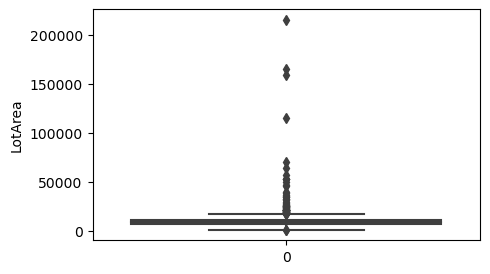

In [71]:
plt.figure(figsize=(5, 3))
sns.boxplot(df["LotArea"]).set(ylabel="LotArea")    
plt.show()

In [72]:
df.LotArea.quantile([0.5, 0.25, 0.50, 0.75, 0.80, 0.95, 0.97, 0.99])

0.50     9478.50
0.25     7553.50
0.50     9478.50
0.75    11601.50
0.80    12205.80
0.95    17401.15
0.97    21571.80
0.99    37567.64
Name: LotArea, dtype: float64

In [73]:
df = df[df.LotArea <= df.LotArea.quantile(0.97)]

##### Visualizing after removing outliers in LotArea

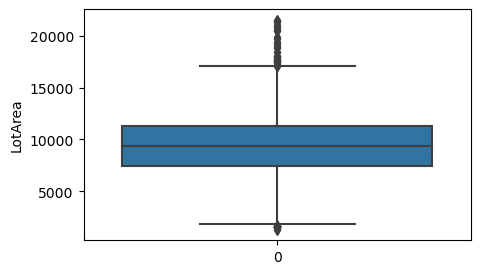

In [74]:
plt.figure(figsize=(5, 3))
sns.boxplot(df["LotArea"]).set(ylabel="LotArea")    
plt.show()

### Visualizing linearity in the data

In [75]:
df[numerical_col].corr()

LotFrontage   LotArea  MasVnrArea  BsmtFinSF1  BsmtUnfSF  \
LotFrontage      1.000000  0.595999    0.175990    0.144540   0.153747   
LotArea          0.595999  1.000000    0.160955    0.188993   0.115603   
MasVnrArea       0.175990  0.160955    1.000000    0.227157   0.121144   
BsmtFinSF1       0.144540  0.188993    0.227157    1.000000  -0.520492   
BsmtUnfSF        0.153747  0.115603    0.121144   -0.520492   1.000000   
TotalBsmtSF      0.329876  0.354701    0.338643    0.455310   0.455001   
CentralAir       0.074935  0.094108    0.127509    0.183250   0.016599   
1stFlrSF         0.371406  0.443836    0.321221    0.384545   0.352139   
2ndFlrSF         0.062763  0.109897    0.155140   -0.174976   0.000145   
GrLivArea        0.329634  0.422468    0.365172    0.126947   0.262848   
BsmtFullBath     0.055963  0.087089    0.074456    0.648458  -0.417367   
FullBath         0.187103  0.211306    0.262186    0.051261   0.288981   
HalfBath         0.055458  0.105312    0.195862   -0.015199  -0.039976   
BedroomAbvGr     0.253939  0.291310    0.092761   -0.111328   0.162366   
TotRmsAbvGrd     0.312051  0.392149    0.269635    0.009647   0.256381   
Fireplaces       0.225439  0.324363    0.253654    0.230012   0.065186   
GarageYrBlt      0.082113  0.032066    0.243581    0.154383   0.187623   
GarageCars       0.295654  0.297292    0.363916    0.219101   0.226285   
GarageArea       0.325747  0.339642    0.367216    0.258350   0.200587   
WoodDeckSF       0.097967  0.172182    0.146442    0.175404   0.017448   
OpenPorchSF      0.126012  0.163006    0.096130    0.071111   0.126466   
SalePrice        0.374628  0.430246    0.470493    0.400031   0.234425   
PropertyAge     -0.134697 -0.084728   -0.310938   -0.253827  -0.157841   
RemodelAge      -0.080007 -0.063429   -0.172409   -0.128524  -0.191288   

              TotalBsmtSF  CentralAir  1stFlrSF  2ndFlrSF  GrLivArea  ...  \
LotFrontage      0.329876    0.074935  0.371406  0.062763   0.329634  ...   
LotArea          0.354701    0.094108  0.443836  0.109897   0.422468  ...   
MasVnrArea       0.338643    0.127509  0.321221  0.155140   0.365172  ...   
BsmtFinSF1       0.455310    0.183250  0.384545 -0.174976   0.126947  ...   
BsmtUnfSF        0.455001    0.016599  0.352139  0.000145   0.262848  ...   
TotalBsmtSF      1.000000    0.221879  0.813133 -0.219699   0.408096  ...   
CentralAir       0.221879    1.000000  0.150224 -0.011653   0.095695  ...   
1stFlrSF         0.813133    0.150224  1.000000 -0.236128   0.533672  ...   
2ndFlrSF        -0.219699   -0.011653 -0.236128  1.000000   0.690894  ...   
GrLivArea        0.408096    0.095695  0.533672  0.690894   1.000000  ...   
BsmtFullBath     0.282959    0.120925  0.212045 -0.176317   0.000191  ...   
FullBath         0.332134    0.110145  0.390485  0.408646   0.640167  ...   
HalfBath        -0.069934    0.139032 -0.132966  0.610236   0.424687  ...   
BedroomAbvGr     0.053883    0.010346  0.130610  0.502674   0.539021  ...   
TotRmsAbvGrd     0.271402    0.034610  0.398538  0.608548   0.829902  ...   
Fireplaces       0.322169    0.186349  0.392315  0.192211   0.451925  ...   
GarageYrBlt      0.328622    0.270173  0.241283  0.066303   0.233725  ...   
GarageCars       0.452981    0.240654  0.447910  0.177636   0.473644  ...   
GarageArea       0.475063    0.240778  0.477239  0.129713   0.455903  ...   
WoodDeckSF       0.226479    0.150969  0.229906  0.084650   0.241703  ...   
OpenPorchSF      0.215087    0.020416  0.185764  0.197802   0.307550  ...   
SalePrice        0.656419    0.258448  0.639136  0.302534   0.727758  ...   
PropertyAge     -0.413026   -0.386255 -0.301042 -0.008783  -0.214879  ...   
RemodelAge      -0.311262   -0.299177 -0.250079 -0.136538  -0.296024  ...   

              TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
LotFrontage       0.312051    0.225439     0.082113    0.295654    0.325747   
LotArea           0.392149    0.324363     0.032066    0.297292    0.339642   


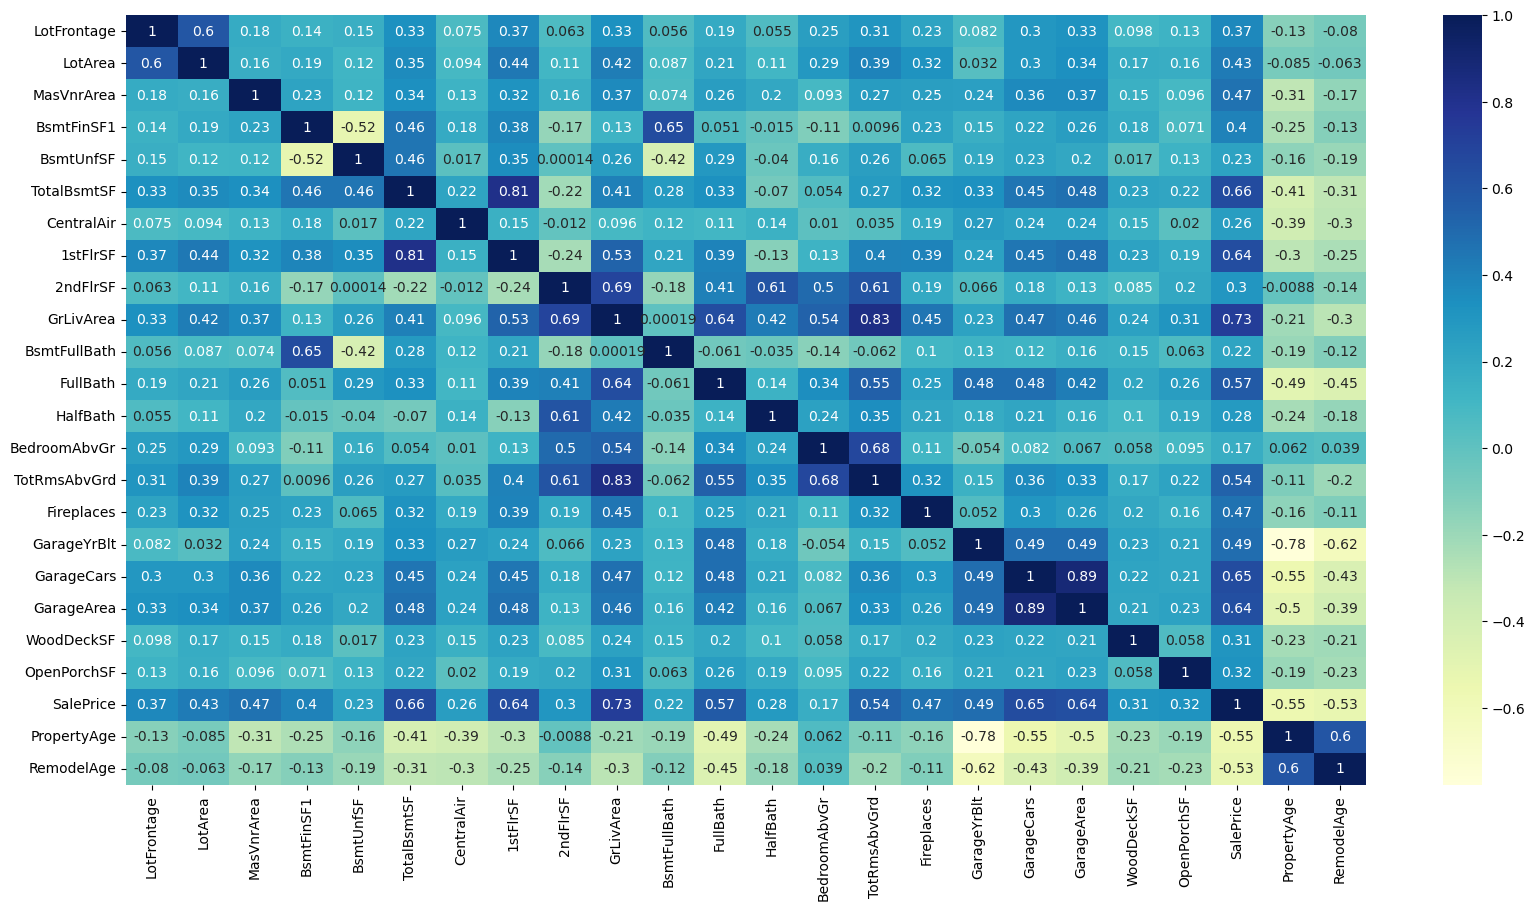

In [76]:
plt.figure(figsize=(20,10))

# heatmap
sns.heatmap(df[numerical_col].corr(), cmap="YlGnBu", annot=True)
plt.show()

In [77]:
len(numerical_col)

24

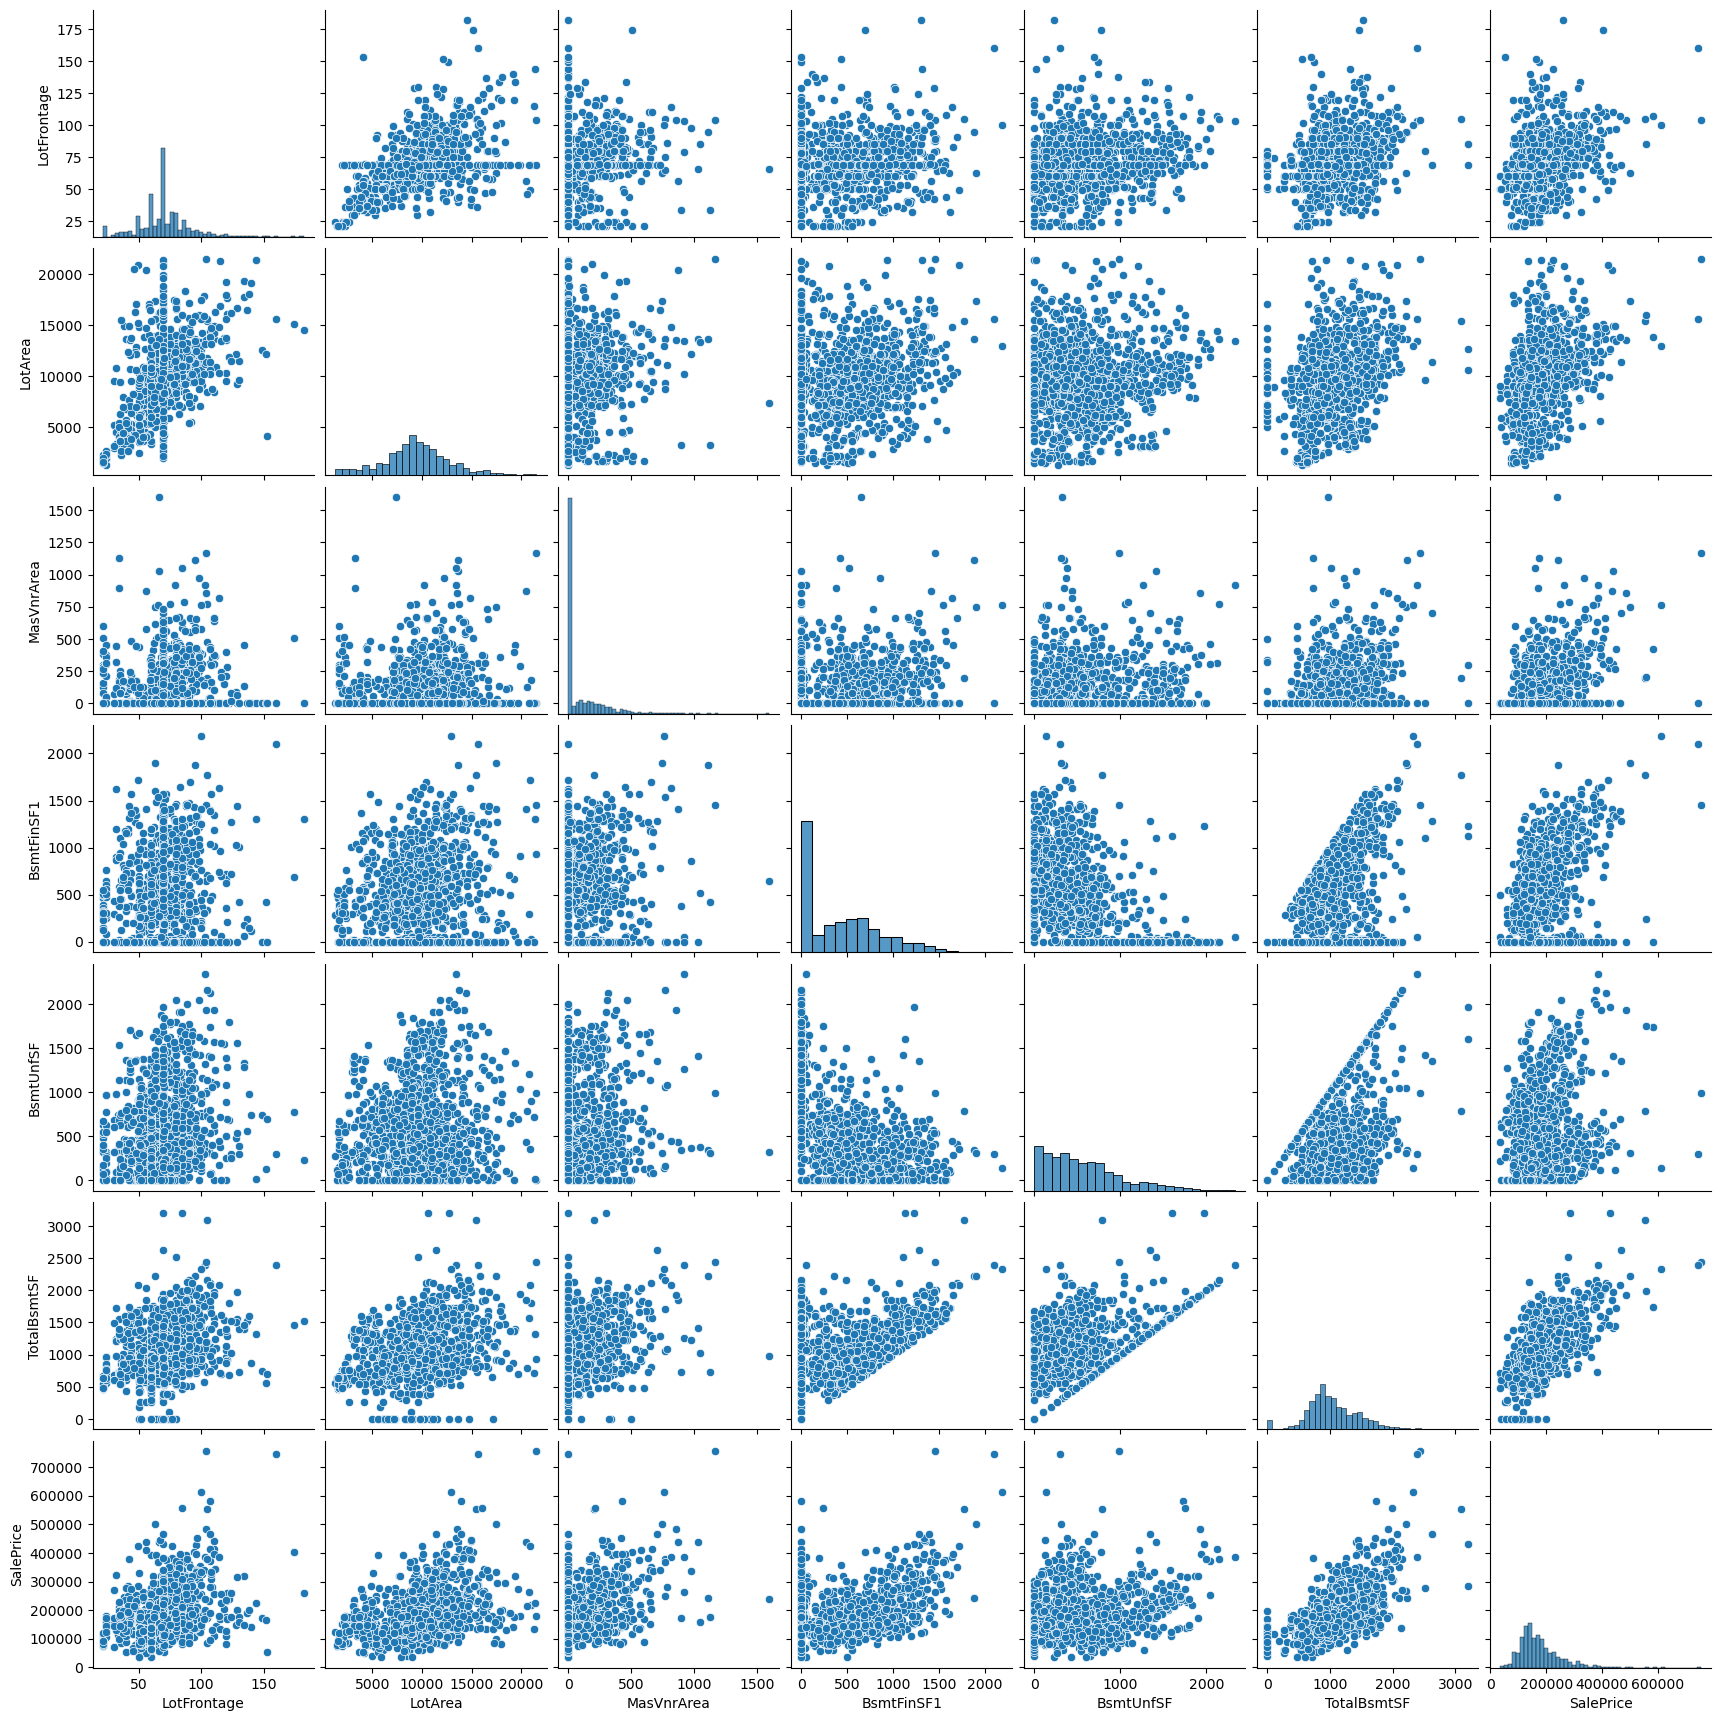

In [78]:
cols = list(numerical_col[0:6])
cols.append("SalePrice")
sns.pairplot(df[cols])

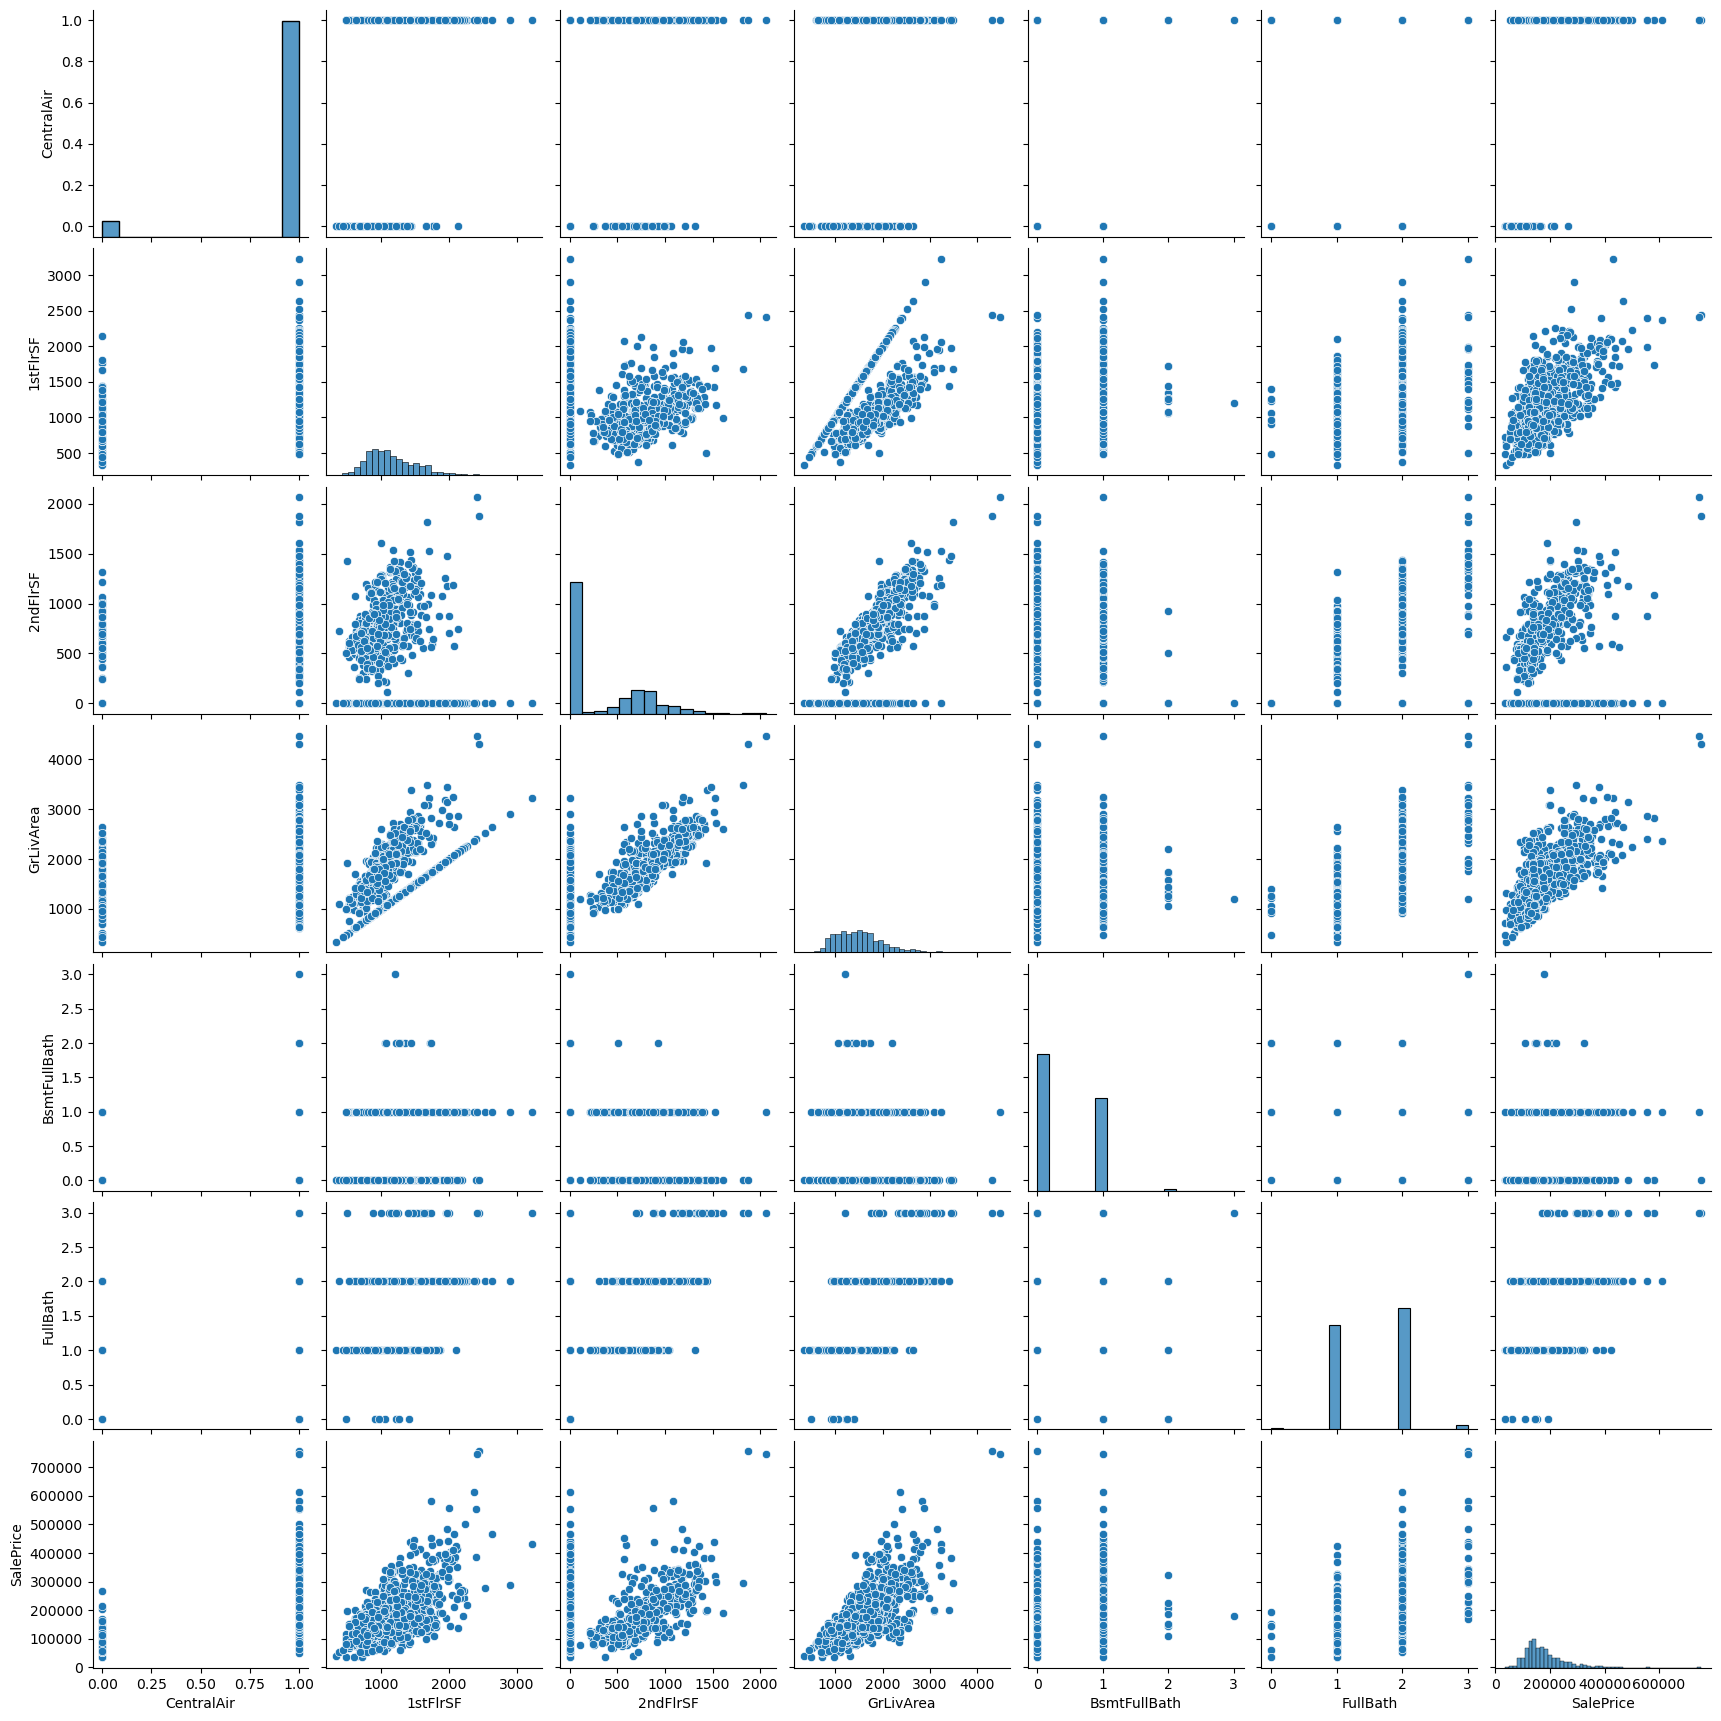

In [79]:
cols = list(numerical_col[6:12])
cols.append("SalePrice")
sns.pairplot(df[cols])

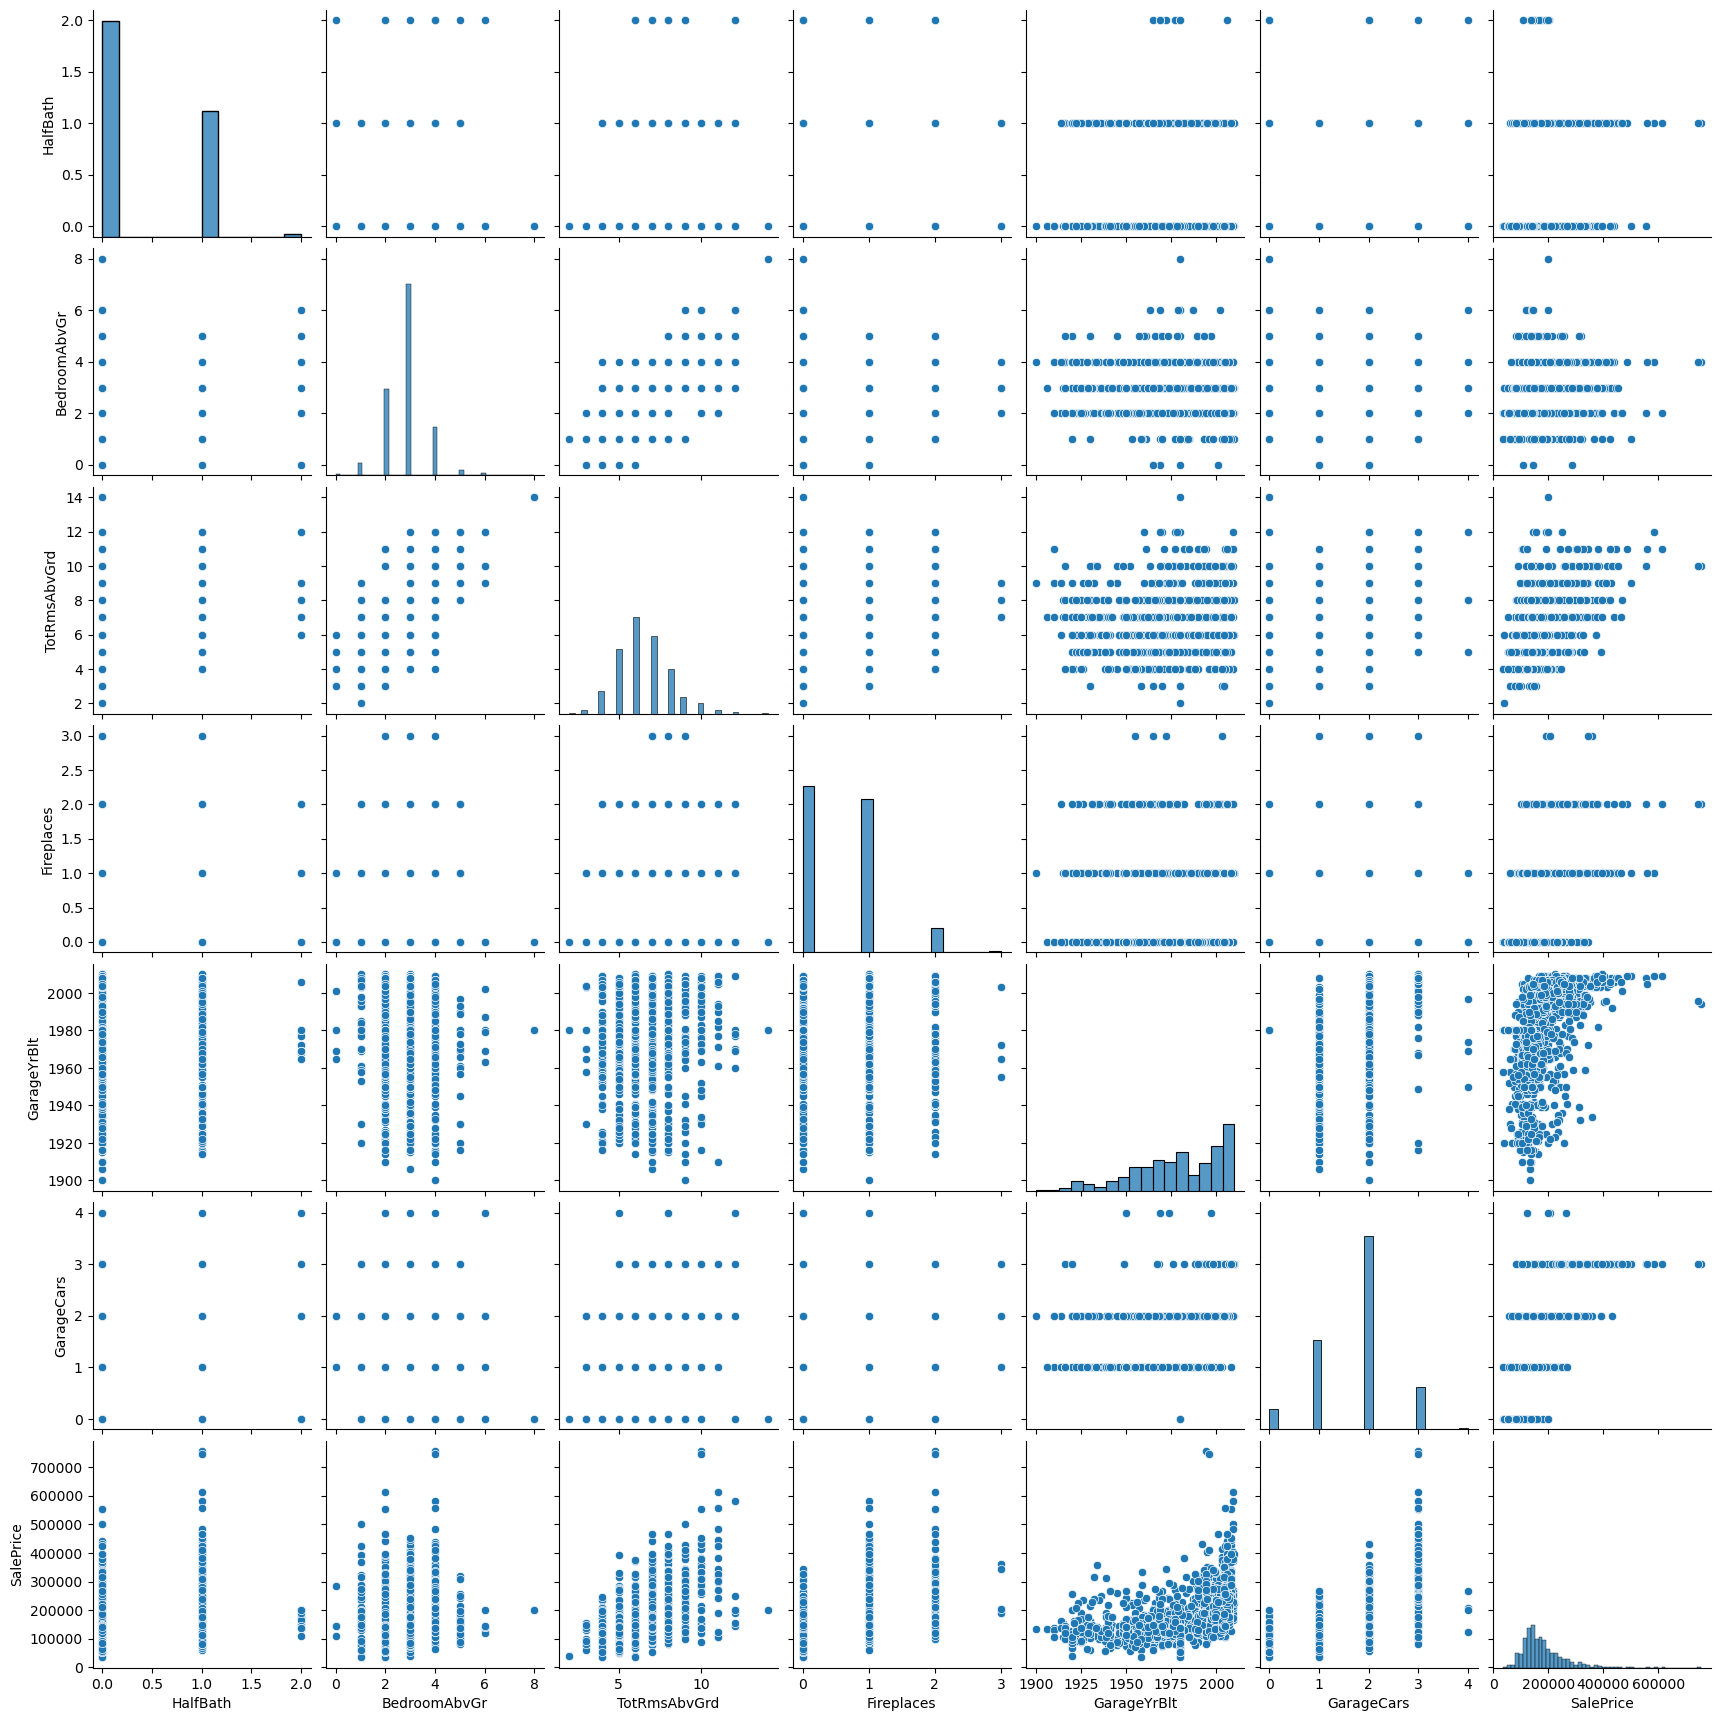

In [80]:
cols = list(numerical_col[12:18])
cols.append("SalePrice")
sns.pairplot(df[cols])

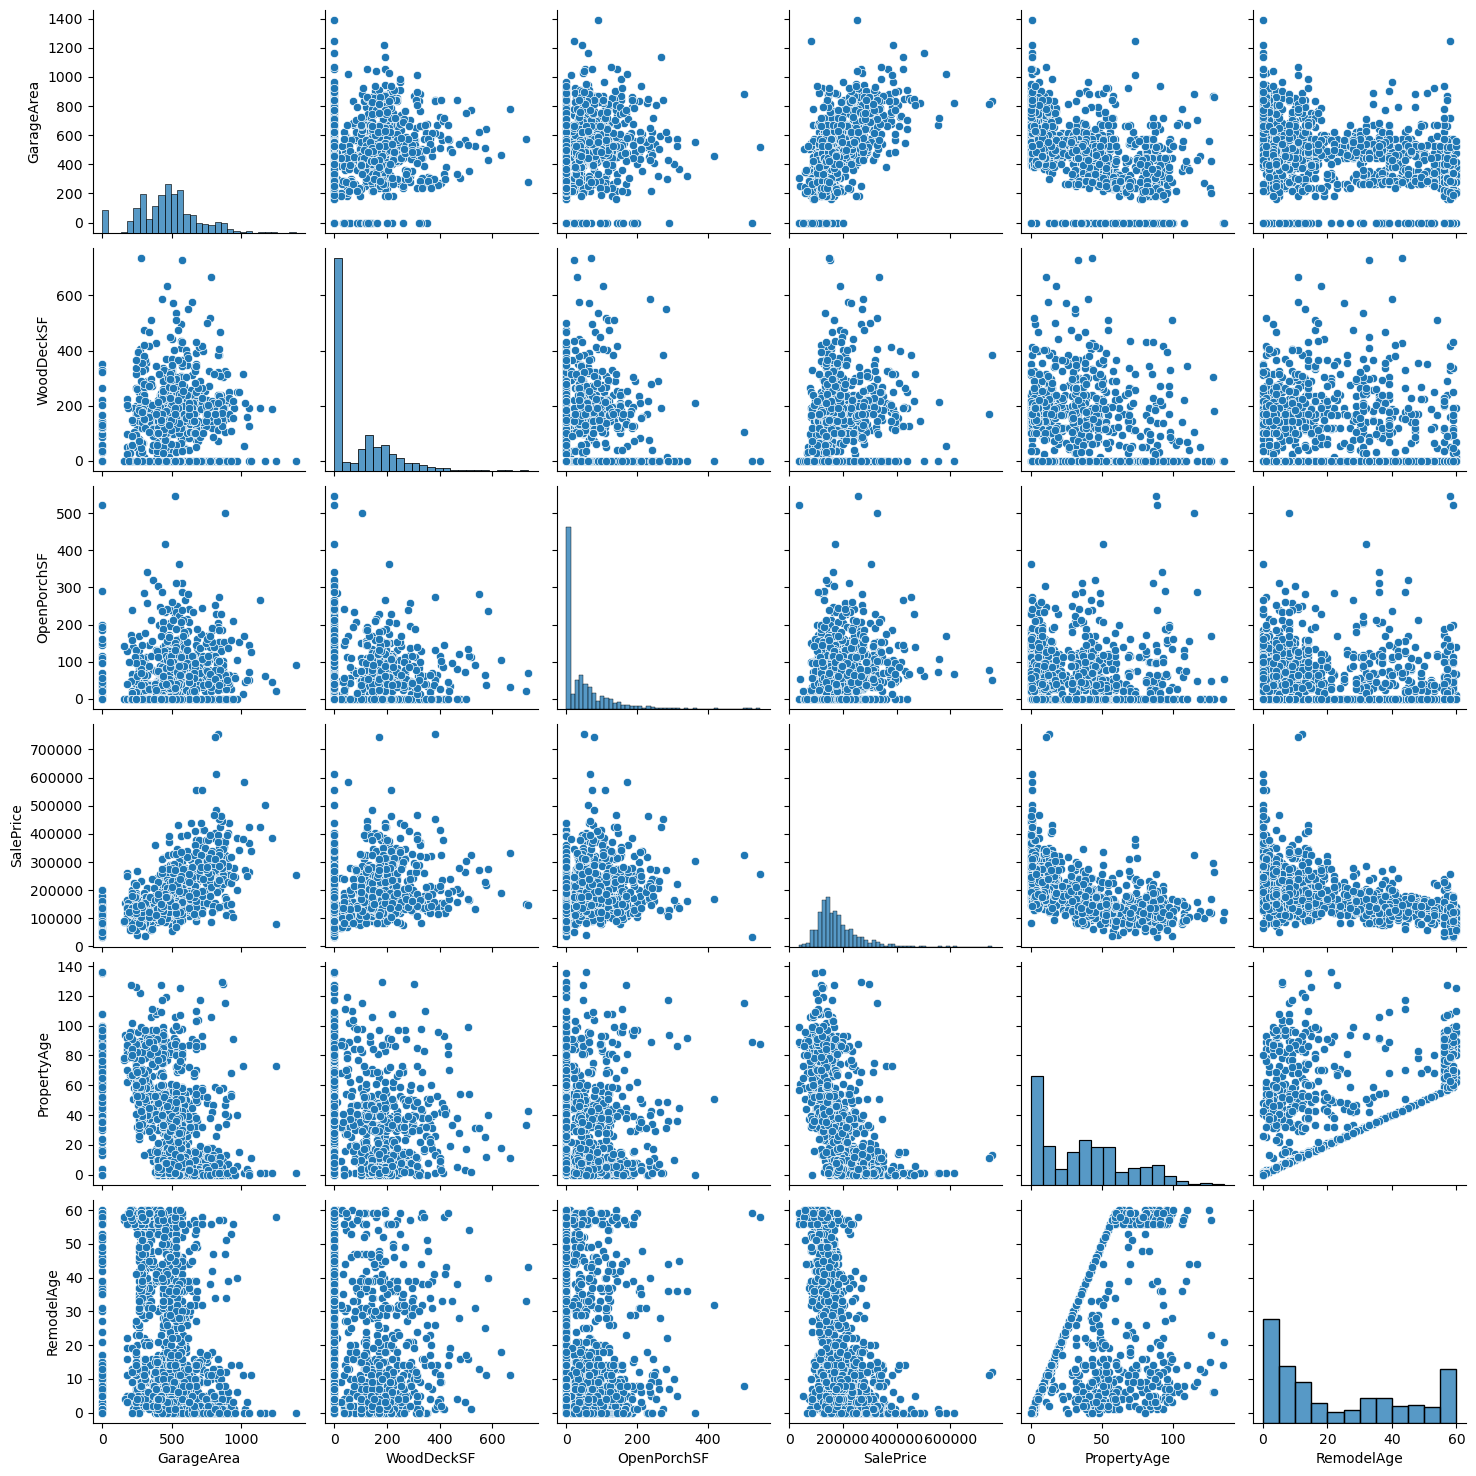

In [81]:
sns.pairplot(df[numerical_col[18:]])

#### Above Pair Plots shows :
- There is multi-colinearity in the data
- Some variables have strong linear relationship with target variable Sale Price
- Ground or First level houses have steady increase in price with the area
- Increase in Property & Remodel Age shows a decreasing saleprice trend i.e newer the property, high is the value
- Increase in Garage,LotArea and TotalBasement area also have rising sale price trend.

### Visualizing categorical data

In [82]:
categorical_col

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PavedDrive', 'MoSold', 'SaleType',
       'SaleCondition'],
      dtype='object')

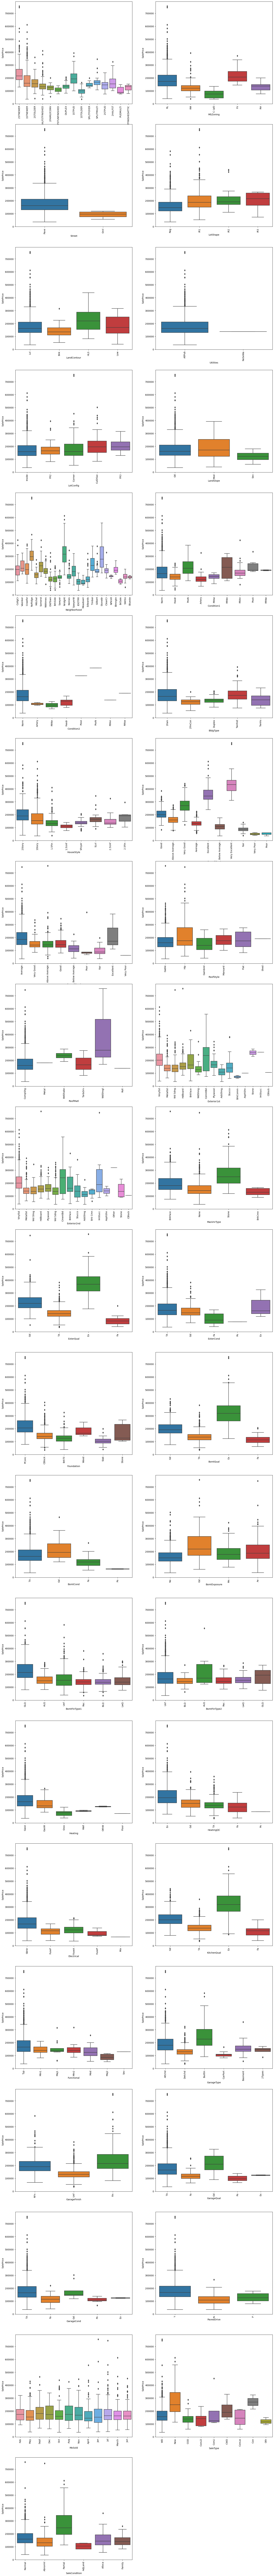

In [83]:
plt.figure(figsize=(20, 200))

for i, col in enumerate(df[categorical_col]):
    try:
        plt.subplot(21,2,int(i)+1)
        plt.xticks(rotation=90)
        sns.boxplot(x = col, y = 'SalePrice', data = df)
    except:
        print(col)
    
plt.show()

#### Observations on categorical data

- New Houses with Paved street access and built in garage have higher sale price
- Rooftype Hip with Wood Shingles material fetches high sale price
- Residential Low Density houses are ranging from low to very high sale price which means they have a potential to be bought at low and sold at higher prices
- Its necesaary to have all the public utilities to be available for the house to be sold
- Properties with slope are not prefered much
- Northridge Heights and Stone Brook localities have much higher sale prices
- 2 story houses with Single-family Detached building type are sold at higher rate
- Better the overall quality of the house higher is the sale price
- Houses having Masonry veneer of stone are sold on higher prices
- Basement is given lowest importance when deciding sale price for the house
- Kitchen and heating quality also plays important role in sale price

### Creating dummy variables

In [84]:
dummyCols = df[categorical_col]
len(dummyCols.columns)

41

In [85]:
dummies = pd.get_dummies(dummyCols, drop_first = True)
len(dummies.columns)

235

In [86]:
len(df.columns)

65

In [87]:
df = pd.concat([df, dummies], axis=1)
len(df.columns)

300

In [88]:
df.drop(categorical_col, axis=1,inplace=True)
len(df.columns)

259

#### Splitting the Data into Training and Testing Sets

In [89]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, train_size=0.7, test_size=0.3, random_state=100)

In [90]:
train.describe()

LotFrontage       LotArea   MasVnrArea   BsmtFinSF1    BsmtUnfSF  \
count   991.000000    991.000000   991.000000   991.000000   991.000000   
mean     69.688194   9530.256307    98.093845   435.902119   563.883956   
std      19.551090   3391.433795   165.999313   422.989676   441.450387   
min      21.000000   1300.000000     0.000000     0.000000     0.000000   
25%      60.000000   7559.000000     0.000000     0.000000   221.500000   
50%      69.000000   9452.000000     0.000000   388.000000   470.000000   
75%      79.000000  11361.500000   161.500000   705.000000   794.500000   
max     182.000000  21453.000000  1600.000000  1767.000000  2336.000000   

       TotalBsmtSF  CentralAir     1stFlrSF     2ndFlrSF    GrLivArea  ...  \
count   991.000000  991.000000   991.000000   991.000000   991.000000  ...   
mean   1040.289606    0.938446  1151.439960   337.485368  1493.824420  ...   
std     415.740831    0.240465   365.434044   421.355139   481.247841  ...   
min       0.000000    0.000000   372.000000     0.000000   438.000000  ...   
25%     793.500000    1.000000   882.000000     0.000000  1124.500000  ...   
50%     976.000000    1.000000  1086.000000     0.000000  1453.000000  ...   
75%    1272.500000    1.000000  1372.000000   728.000000  1768.000000  ...   
max    3206.000000    1.000000  3228.000000  1540.000000  3447.000000  ...   

       SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  \
count      991.000000      991.000000    991.000000    991.000000   
mean         0.002018        0.004036      0.086781      0.003027   
std          0.044901        0.063436      0.281656      0.054965   
min          0.000000        0.000000      0.000000      0.000000   
25%          0.000000        0.000000      0.000000      0.000000   
50%          0.000000        0.000000      0.000000      0.000000   
75%          0.000000        0.000000      0.000000      0.000000   
max          1.000000        1.000000      1.000000      1.000000   

       SaleType_WD  SaleCondition_AdjLand  SaleCondition_Alloca  \
count   991.000000             991.000000            991.000000   
mean      0.864783               0.003027              0.009082   
std       0.342128               0.054965              0.094912   
min       0.000000               0.000000              0.000000   
25%       1.000000               0.000000              0.000000   
50%       1.000000               0.000000              0.000000   
75%       1.000000               0.000000              0.000000   
max       1.000000               1.000000              1.000000   

       SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
count            991.000000            991.000000             991.000000  
mean               0.014127              0.812311               0.087790  
std                0.118075              0.390661               0.283132  
min                0.000000              0.000000               0.000000  
25%                0.000000              1.000000               0.000000  
50%                0.000000              1.000000               0.000000  
75%                0.000000              1.000000               0.000000  
max                1.000000              1.000000               1.000000  

[8 rows x 259 columns]

Rescaling of the numerical data is needed. Using min max scaler for standardization.

In [91]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Scaling only numeric variables as categorical variables already converted to dummies with binary scale
train[numerical_col] = scaler.fit_transform(train[numerical_col])
test[numerical_col] = scaler.transform(test[numerical_col])

In [92]:
train.describe()

LotFrontage       LotArea    MasVnrArea  BsmtFinSF1     BsmtUnfSF  \
count  9.910000e+02  9.910000e+02  9.910000e+02  991.000000  9.910000e+02   
mean   2.948645e-16 -1.183043e-16  9.320944e-17    0.000000  1.971738e-17   
std    1.000505e+00  1.000505e+00  1.000505e+00    1.000505  1.000505e+00   
min   -2.491563e+00 -2.428003e+00 -5.912276e-01   -1.031047 -1.277989e+00   
25%   -4.957824e-01 -5.815392e-01 -5.912276e-01   -1.031047 -7.759804e-01   
50%   -3.521754e-02 -2.308635e-02 -5.912276e-01   -0.113304 -2.127790e-01   
75%    4.765212e-01  5.402341e-01  3.821592e-01    0.636502  5.226691e-01   
max    5.747430e+00  3.517322e+00  9.052233e+00    3.148469  4.016331e+00   

        TotalBsmtSF    CentralAir      1stFlrSF      2ndFlrSF     GrLivArea  \
count  9.910000e+02  9.910000e+02  9.910000e+02  9.910000e+02  9.910000e+02   
mean  -2.581185e-16 -2.366086e-16  2.993457e-16 -5.735966e-17 -4.660472e-17   
std    1.000505e+00  1.000505e+00  1.000505e+00  1.000505e+00  1.000505e+00   
min   -2.503519e+00 -3.904600e+00 -2.133993e+00 -8.013567e-01 -2.195038e+00   
25%   -5.939138e-01  2.561082e-01 -7.376872e-01 -8.013567e-01 -7.678183e-01   
50%   -1.547167e-01  2.561082e-01 -1.791650e-01 -8.013567e-01 -8.487318e-02   
75%    5.588281e-01  2.561082e-01  6.038611e-01  9.272743e-01  5.700057e-01   
max    5.211910e+00  2.561082e-01  5.685317e+00  2.855363e+00  4.060614e+00   

       ...  SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  \
count  ...      991.000000      991.000000    991.000000    991.000000   
mean   ...        0.002018        0.004036      0.086781      0.003027   
std    ...        0.044901        0.063436      0.281656      0.054965   
min    ...        0.000000        0.000000      0.000000      0.000000   
25%    ...        0.000000        0.000000      0.000000      0.000000   
50%    ...        0.000000        0.000000      0.000000      0.000000   
75%    ...        0.000000        0.000000      0.000000      0.000000   
max    ...        1.000000        1.000000      1.000000      1.000000   

       SaleType_WD  SaleCondition_AdjLand  SaleCondition_Alloca  \
count   991.000000             991.000000            991.000000   
mean      0.864783               0.003027              0.009082   
std       0.342128               0.054965              0.094912   
min       0.000000               0.000000              0.000000   
25%       1.000000               0.000000              0.000000   
50%       1.000000               0.000000              0.000000   
75%       1.000000               0.000000              0.000000   
max       1.000000               1.000000              1.000000   

       SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
count            991.000000            991.000000             991.000000  
mean               0.014127              0.812311               0.087790  
std                0.118075              0.390661               0.283132  
min                0.000000              0.000000               0.000000  
25%                0.000000              1.000000               0.000000  
50%                0.000000              1.000000               0.000000  
75%                0.000000              1.000000               0.000000  
max                1.000000              1.000000               1.000000  

[8 rows x 259 columns]

### Modeling on training Data

#### Dividing train data into X and Y Sets

In [93]:
y_train = train.pop('SalePrice')
x_train = train

In [94]:
y_test = test.pop('SalePrice')
x_test = test

#### Linear Model Building

In [95]:
from sklearn.linear_model import LinearRegression

# Creating Linear Regression model using SciKit Learn
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

#### Model Prediction

In [96]:
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)

#### Model Evaluation

In [97]:
from sklearn.metrics import r2_score, mean_squared_error

In [98]:
lr_train_r2 = r2_score(y_train, y_pred_train)
lr_train_r2

0.9104753378816227

In [99]:
lr_test_r2 = r2_score(y_test, y_pred_test)
lr_test_r2

-3.1200260751230154e+20

##### R2 score on test data is significantly low with normal linear regression. Lets try Regularization techniques to improvise model performance on unseen data

In [100]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

## Ridge Regularization

In [101]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(x_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [102]:
print(model_cv.best_params_)

{'alpha': 4.0}


### <Font color="Red"> From below results, 4.0 is chosen as best alpha for Ridge beacuse the mean test score is lowest </Font>

In [103]:
rdf = pd.DataFrame(model_cv.cv_results_)
rdf[rdf['param_alpha']<=5][['param_alpha','mean_train_score','std_train_score','mean_test_score','std_test_score']]

param_alpha  mean_train_score  std_train_score  mean_test_score  \
0       0.0001         -0.152174         0.001223        -0.234529   
1        0.001         -0.152187         0.001222        -0.234341   
2         0.01         -0.152308         0.001228        -0.232741   
3         0.05         -0.152769         0.001328        -0.228251   
4          0.1         -0.153197         0.001450        -0.225264   
5          0.2         -0.153822         0.001618        -0.221741   
6          0.3         -0.154284         0.001723        -0.219288   
7          0.4         -0.154684         0.001796        -0.217456   
8          0.5         -0.155054         0.001862        -0.215963   
9          0.6         -0.155393         0.001911        -0.214716   
10         0.7         -0.155721         0.001954        -0.213652   
11         0.8         -0.156041         0.001990        -0.212713   
12         0.9         -0.156346         0.002018        -0.211927   
13         1.0         -0.156643         0.002038        -0.211262   
14         2.0         -0.159167         0.002053        -0.207826   
15         3.0         -0.161323         0.002012        -0.206785   
16         4.0         -0.163204         0.002008        -0.206693   
17         5.0         -0.164967         0.002043        -0.207284   

    std_test_score  
0         0.007310  
1         0.007275  
2         0.006903  
3         0.005691  
4         0.004703  
5         0.003639  
6         0.003004  
7         0.002658  
8         0.002454  
9         0.002422  
10        0.002560  
11        0.002790  
12        0.003085  
13        0.003404  
14        0.005429  
15        0.006577  
16        0.007428  
17        0.008064

In [104]:
#Fitting Ridge model for alpha = 4
alpha = 4.0
ridge = Ridge(alpha=alpha)

ridge.fit(x_train, y_train)

Ridge(alpha=4.0)

In [105]:
y_pred_train = ridge.predict(x_train)
y_pred_test = ridge.predict(x_test)

In [106]:
ridge_train_r2 = r2_score(y_train, y_pred_train)
ridge_train_r2

0.9385203516514612

In [107]:
ridge_test_r2 = r2_score(y_test, y_pred_test)
ridge_test_r2

0.912144014899987

## Lasso Regularization

In [108]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(x_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [109]:
print(model_cv.best_params_)

{'alpha': 0.001}


### <Font color="Red">  From below results, 0.001 is chosen as best alpha for Lasso beacuse the mean test score is lowest </Font>

In [110]:
rdf = pd.DataFrame(model_cv.cv_results_)
rdf[rdf['param_alpha']<=1][['param_alpha','mean_train_score','std_train_score','mean_test_score','std_test_score']]

param_alpha  mean_train_score  std_train_score  mean_test_score  \
0       0.0001         -0.154956         0.001699        -0.216248   
1        0.001         -0.168650         0.002070        -0.203441   
2         0.01         -0.236662         0.004305        -0.253801   
3         0.05         -0.295310         0.005123        -0.301981   
4          0.1         -0.307368         0.003963        -0.313806   
5          0.2         -0.353965         0.004068        -0.359713   
6          0.3         -0.426426         0.003677        -0.431752   
7          0.4         -0.514822         0.003971        -0.519274   
8          0.5         -0.604212         0.003570        -0.609477   
9          0.6         -0.681784         0.005613        -0.686270   
10         0.7         -0.734699         0.014584        -0.737908   
11         0.8         -0.743705         0.020064        -0.745527   
12         0.9         -0.743705         0.020064        -0.745527   
13         1.0         -0.743705         0.020064        -0.745527   

    std_test_score  
0         0.003992  
1         0.006415  
2         0.018114  
3         0.019722  
4         0.019226  
5         0.027856  
6         0.044817  
7         0.056929  
8         0.070113  
9         0.074389  
10        0.071586  
11        0.065616  
12        0.065616  
13        0.065616

### Fitting model with best alpha selected by grid search

In [111]:
#Fitting Lasso model for alpha = 0.001
alpha = 0.001
lasso = Lasso(alpha=alpha)

lasso.fit(x_train, y_train)

Lasso(alpha=0.001)

In [112]:
y_pred_train = lasso.predict(x_train)
y_pred_test = lasso.predict(x_test)

In [113]:
lasso_train_r2 = r2_score(y_train, y_pred_train)
lasso_train_r2

0.9344669145816011

In [114]:
lasso_test_r2 = r2_score(y_test, y_pred_test)
lasso_test_r2

0.9154968712244933

#### Coefficient metrics

In [115]:
coef = pd.DataFrame(index=x_train.columns)
coef.rows = x_train.columns

In [116]:
coef['Linear'] = lr.coef_
coef['Ridge'] = ridge.coef_
coef['Lasso'] = lasso.coef_

In [117]:
pd.set_option('display.max_rows', None)

In [118]:
coef[coef['Lasso'] == 0].sort_values(by="Ridge")

Linear     Ridge  Lasso
Functional_Sev              -5.934871e-01 -0.127281   -0.0
GarageCond_Po               -5.721293e+12 -0.108991   -0.0
Foundation_Wood             -1.275775e-01 -0.097385   -0.0
LandSlope_Sev                1.213051e-02 -0.096180   -0.0
HouseStyle_2.5Fin           -1.440644e-02 -0.094585   -0.0
Condition1_RRAe             -1.784249e-01 -0.088560   -0.0
MSSubClass_1STPUD           -2.374245e-01 -0.078326   -0.0
Functional_Mod               1.583507e-01 -0.077702   -0.0
MSSubClass_SPLITFOYER       -6.739936e-02 -0.069680   -0.0
ExterQual_Fa                 1.502763e-01 -0.066753   -0.0
Exterior1st_VinylSd          4.284412e-02 -0.064655   -0.0
Exterior1st_BrkComm          3.825391e-01 -0.061593   -0.0
BsmtCond_Po                 -1.503935e+12 -0.060227   -0.0
Foundation_Stone             1.676483e-01 -0.055572   -0.0
RoofMatl_WdShngl            -2.490207e-01 -0.052418   -0.0
BsmtQual_Fa                 -1.155962e-01 -0.051292   -0.0
SaleCondition_Family         1.089515e-01 -0.049909   -0.0
RoofStyle_Shed              -1.421510e+12 -0.047926   -0.0
Condition2_RRAe              1.421510e+12 -0.047926   -0.0
BldgType_2fmCon              5.968356e-01 -0.045719   -0.0
Neighborhood_CollgCr        -2.360830e-01 -0.043074    0.0
Condition2_PosN             -1.088246e+00 -0.040211   -0.0
HouseStyle_2Story           -7.670846e-02 -0.039342   -0.0
Exterior1st_ImStucc         -1.071026e-01 -0.037683   -0.0
MoSold_Feb                   7.511790e-02 -0.037161   -0.0
OverallCond_Very Poor        1.131182e+12 -0.036973   -0.0
OverallQual_Very Poor        3.727535e+11 -0.036973   -0.0
ExterCond_TA                 3.337787e-01 -0.036494    0.0
GarageQual_TA                5.721293e+12 -0.035698    0.0
Condition2_RRAn             -1.025135e+00 -0.034333   -0.0
Neighborhood_IDOTRR         -9.351721e-02 -0.033256   -0.0
Exterior2nd_AsphShn         -2.782010e-02 -0.032063   -0.0
Exterior2nd_Other           -8.141941e-01 -0.030929   -0.0
Exterior2nd_Stone           -2.033003e-01 -0.030259   -0.0
Exterior2nd_Brk Cmn         -2.424262e-01 -0.030150   -0.0
GarageCond_Fa               -5.721293e+12 -0.029557   -0.0
GarageQual_Po                5.721293e+12 -0.029367   -0.0
Heating_Grav                 1.641344e-01 -0.029309   -0.0
MSSubClass_PUDMULTI         -1.524650e-01 -0.029168   -0.0
MoSold_Nov                   3.379308e-02 -0.027792   -0.0
BsmtFinType1_LwQ             3.299206e-02 -0.027502   -0.0
OverallCond_Poor             6.024671e-01 -0.026546   -0.0
Heating_GasA                -1.238157e-02 -0.026048   -0.0
PavedDrive_Y                -2.642884e-01 -0.024799   -0.0
ExterCond_Po                -2.513226e-01 -0.024735   -0.0
LotConfig_FR2               -1.040526e-01 -0.024376   -0.0
MSSubClass_2HALFST          -1.482933e-01 -0.023431   -0.0
Electrical_Mix               1.503935e+12 -0.023253   -0.0
Utilities_NoSeWa             1.333810e-01 -0.020797   -0.0
RoofMatl_Roll               -5.250306e-02 -0.019611   -0.0
Exterior2nd_MetalSd         -8.567878e-02 -0.019538    0.0
Exterior1st_Stone            2.937208e-01 -0.019471   -0.0
BsmtCond_Gd                  4.389519e-03 -0.019128   -0.0
SaleType_ConLD               4.360917e-02 -0.018819   -0.0
RoofMatl_WdShake             1.542186e-01 -0.018616   -0.0
Neighborhood_SawyerW        -1.671554e-01 -0.017849    0.0
MoSold_Sept                 -1.637508e-02 -0.017794   -0.0
Neighborhood_ClearCr        -2.899788e-01 -0.016655    0.0
BsmtFinType2_LwQ            -2.789709e-01 -0.013122    0.0
Heating_GasW                -1.440526e-02 -0.013082    0.0
Condition1_Feedr            -1.770212e-01 -0.011982   -0.0
OverallQual_Poor             2.008670e-01 -0.010572    0.0
Condition1_PosA             -2.286511e-01 -0.010053   -0.0
Functional_Min1              1.269488e-01 -0.009165   -0.0
Functional_Maj2              8.006429e-01 -0.006428   -0.0
RoofStyle_Hip               -8.078760e-01 -0.005899    0.0
MoSold_Dec                   1.014669e-01 -0.004885    0.0
MSZoning_RH            

#### <Font color="Blue"> As Seen above, Lasso helps in feature selection by making the coefficient value zero, filtering these features to identify the significant features and their impact on house pricing <Font>

In [119]:
coef[coef['Lasso'] != 0].sort_values(by="Lasso")

Linear     Ridge     Lasso
MSSubClass_DUPLEX             2.427589e+12 -0.128094 -0.221598
OverallCond_Fair             -3.000844e-01 -0.223812 -0.197726
KitchenQual_Fa               -2.808017e-01 -0.198778 -0.177264
BldgType_Twnhs               -1.970558e-01 -0.132914 -0.168710
KitchenQual_TA               -1.681187e-01 -0.188454 -0.165490
PropertyAge                  -1.213622e-01 -0.143737 -0.155927
BsmtQual_Gd                  -2.134015e-01 -0.186734 -0.145548
KitchenQual_Gd               -1.488706e-01 -0.174553 -0.140648
OverallCond_Below Average    -1.433187e-01 -0.139082 -0.129074
OverallCond_Average          -8.283576e-02 -0.106480 -0.111730
BldgType_TwnhsE              -1.047452e-02 -0.054801 -0.108199
MSSubClass_2FAMILYCONV       -6.390335e-01 -0.081790 -0.098267
Neighborhood_Edwards         -3.693699e-01 -0.160184 -0.093530
LandContour_Low              -4.191528e-02 -0.107195 -0.089263
Neighborhood_Gilbert         -3.583362e-01 -0.135606 -0.075517
BsmtQual_TA                  -2.637293e-01 -0.119582 -0.071416
Neighborhood_OldTown         -1.164073e-01 -0.112057 -0.070957
Neighborhood_NAmes           -3.029195e-01 -0.132479 -0.069367
Neighborhood_Timber          -3.923913e-01 -0.137816 -0.067299
ExterQual_TA                 -1.087123e-01 -0.164908 -0.060686
Exterior1st_Wd Sdng          -1.385269e-01 -0.115662 -0.051168
BsmtFinType2_Rec             -1.485110e-01 -0.101774 -0.050961
OverallQual_Fair             -9.235913e-03 -0.088538 -0.049259
Neighborhood_NWAmes          -1.607930e-01 -0.123963 -0.048389
Exterior2nd_Plywood          -8.727605e-02 -0.033318 -0.048240
ExterQual_Gd                 -1.312087e-01 -0.147799 -0.043031
Foundation_CBlock             1.206642e-01 -0.017264 -0.036768
Neighborhood_Mitchel         -1.867336e-01 -0.106658 -0.033672
Exterior1st_HdBoard           1.858770e-01 -0.031071 -0.033048
BedroomAbvGr                 -2.509243e-02 -0.041782 -0.032880
PavedDrive_P                 -2.246175e-01 -0.099510 -0.031982
BsmtExposure_No              -1.409113e-01 -0.053436 -0.031635
RemodelAge                   -2.404371e-02 -0.031679 -0.030330
GarageQual_Fa                 5.721293e+12 -0.072329 -0.026358
Exterior2nd_Wd Shng          -2.107887e-02 -0.053537 -0.025273
Neighborhood_Sawyer          -1.736719e-01 -0.073417 -0.024251
ExterCond_Gd                  2.731010e-01 -0.070998 -0.023168
SaleType_WD                   5.986991e-02 -0.035666 -0.022941
Neighborhood_MeadowV         -4.321049e-01 -0.143698 -0.022239
BsmtFinType1_Rec              3.384912e-02 -0.032575 -0.020317
GarageType_Basment            1.246888e-01 -0.077880 -0.019117
BldgType_Duplex              -2.427589e+12 -0.128094 -0.017872
Exterior2nd_HdBoard          -1.438065e-01 -0.020744 -0.016616
OverallQual_Average           4.093097e-02 -0.028226 -0.015829
RoofStyle_Gable              -7.931654e-01 -0.023173 -0.014091
MoSold_March                 -1.011498e-01 -0.026840 -0.013512
MSSubClass_2STPUD            -6.046486e-02 -0.084960 -0.011875
HouseStyle_1Story             8.118547e-03 -0.013792 -0.010563
BsmtExposure_Mn              -2.448374e-01 -0.034931 -0.008466
BsmtFinType2_Unf             -3.097915e-01 -0.064529 -0.008039
GarageType_CarPort            1.623308e-01 -0.048916 -0.006728
OverallQual_Below Average     1.015181e-01 -0.035684 -0.005623
BsmtFinType2_BLQ             -3.828678e-01 -0.087886 -0.003416
Exterior1st_Plywood           1.236634e-01 -0.036477 -0.001935
BsmtUnfSF                     1.555368e-01 -0.006394 -0.001811
MoSold_Aug                   -1.763281e-02 -0.029221 -0.000358
MoSold_Oct                   -7.205162e-02 -0.019392 -0.000272
Condition2_Norm              -6.901062e-01  0.057284  0.001170
BsmtFinType1_Unf             -3.470577e-02  0.027479  0.001431
LotConfig_Inside             -4.079914e-02  0.002003  0.001455
HalfBath                      1.621028e-02  0.006628  0.002386
Neighborhood_Somerst         -3.162287e-02  0.007500  0.003512
LotShape_Reg                  2.387789e-02  0.013287  0.005482
Exte

In [120]:
print("ridge_train_r2 : " , ridge_train_r2)
print("ridge_test_r2 : " , ridge_test_r2)
print("lasso_train_r2 : " , lasso_train_r2)
print("lasso_test_r2 : " , lasso_test_r2)

ridge_train_r2 :  0.9385203516514612
ridge_test_r2 :  0.912144014899987
lasso_train_r2 :  0.9344669145816011
lasso_test_r2 :  0.9154968712244933


##### <Font color="Blue"> Though ridge regression results seems a little better than lasso, because lasso also helps in feature selection, lets go ahead with lasso to decide significant features for house price prediction </Font>

### <Font color="Red"> Optimal Values For Ridge and Lasso </Font>
- Ridge : 4.0
- Lasso : 0.001

### <Font color="Red">  Most Significant Features in house price prediction </Font>

#### Features that negatively impacts house prices

- MSSubClass_DUPLEX       :         -0.221598
- OverallCond_Fair        :         -0.197726
- KitchenQual_Fa          :         -0.177264
- BldgType_Twnhs          :         -0.168710
- KitchenQual_TA          :         -0.165490
- PropertyAge             :         -0.155927
- BsmtQual_Gd             :         -0.145548

#### Features that positively impacts house prices

- OverallQual_Very Excellent    :    0.988202
- OverallQual_Excellent         :    0.757556
- Neighborhood_StoneBr          :    0.414192
- OverallQual_Very Good         :    0.367675
- Neighborhood_Crawfor          :    0.306493
							    : 
- SaleCondition_Partial         :    0.253279
- BsmtExposure_Gd               :    0.232473
- Neighborhood_NoRidge          :    0.231558
- Exterior1st_BrkFace           :    0.229110
- GrLivArea                     :    0.201049
- OverallCond_Excellent         :    0.200127

## Conclusion

- <Font color="red"> Duplex type Townhouse dwellings fetches least house price
- <Font color="red"> Lower the Overall Condition, Kitchen Quality and Basement Quality of the house, lower is the sale price
- <Font color="red"> Older is the property, lesser is the price
- <Font color="green"> Higher is the overall quality of the house, more the sale price
- <Font color="green"> Properties in the neighbourhood of Stone Brook and Crawford and Northridge fetch higher sale price
- <Font color="green"> New Construction houses have higher sale prices
- <Font color="green"> Properties with good garden level walls and Brick Face exterior get sold at higher price
- <Font color="green"> Above ground living area also plays important role in fetching higher sale prices
- <Font color="blue"> Company should purchase the House when the Market Price of the house is lower than the predicted price of the house


### Assignment Q3 : Removing top 5 features from Lasso

Removing top 5 negative and positive features

In [121]:
x_train_new = x_train.drop(["OverallQual_Very Excellent","OverallQual_Excellent","Neighborhood_StoneBr","OverallQual_Very Good","Neighborhood_Crawfor","MSSubClass_DUPLEX","OverallCond_Fair","KitchenQual_Fa","BldgType_Twnhs","KitchenQual_TA"], axis=1)

In [122]:
x_test_new = x_test.drop(["OverallQual_Very Excellent","OverallQual_Excellent","Neighborhood_StoneBr","OverallQual_Very Good","Neighborhood_Crawfor","MSSubClass_DUPLEX","OverallCond_Fair","KitchenQual_Fa","BldgType_Twnhs","KitchenQual_TA"], axis=1)

In [123]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

lasso = Lasso()

# cross validation
folds = 5
model_cv_new = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv_new.fit(x_train_new, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [124]:
model_cv_new.best_params_

{'alpha': 0.001}

In [125]:
alpha = 0.001
lasso = Lasso(alpha=alpha)

lasso.fit(x_train_new, y_train)

y_pred_train_new = lasso.predict(x_train_new)
y_pred_test_new = lasso.predict(x_test_new)

print(r2_score(y_train, y_pred_train_new))
print(r2_score(y_test, y_pred_test_new))

0.9195635668971076
0.9024255648251388


In [126]:
coef_new = pd.DataFrame(index=x_train_new.columns)
coef_new.rows = x_train_new.columns

coef_new['Lasso'] = lasso.coef_

In [127]:
coef_new[coef_new['Lasso'] != 0].sort_values(by="Lasso", ascending=False)

Lasso
SaleCondition_Partial         0.331441
OverallCond_Excellent         0.261087
Exterior1st_BrkFace           0.240641
BsmtExposure_Gd               0.229118
Functional_Typ                0.225796
2ndFlrSF                      0.218354
1stFlrSF                      0.198571
MSZoning_FV                   0.190329
Exterior2nd_CmentBd           0.177665
Neighborhood_NoRidge          0.152298
Neighborhood_NridgHt          0.151292
MSZoning_RL                   0.149482
MSSubClass_2STOLDER           0.147268
LandContour_HLS               0.142054
MasVnrType_Stone              0.139189
GarageType_BuiltIn            0.137161
GrLivArea                     0.131739
Condition1_Norm               0.129396
SaleCondition_Normal          0.128987
TotalBsmtSF                   0.125531
OverallCond_Very Good         0.097826
OverallCond_Good              0.096910
LotConfig_CulDSac             0.095706
BsmtFinSF1                    0.081504
BsmtCond_TA                   0.079106
MSSubClass_1HALFSTUNFINISHED  0.078475
Exterior2nd_Wd Sdng           0.075976
BsmtFinType1_GLQ              0.075584
LotArea                       0.056510
Fireplaces                    0.051323
MoSold_Jul                    0.048640
BsmtFinType1_Unf              0.042707
Foundation_PConc              0.042222
GarageCars                    0.040421
FullBath                      0.039296
MSSubClass_2STNEWER           0.038882
Exterior2nd_Stucco            0.038332
MasVnrArea                    0.037191
GarageQual_Gd                 0.035604
MasVnrType_None               0.034779
MoSold_May                    0.031259
MoSold_Jan                    0.029385
LotFrontage                   0.028582
SaleType_CWD                  0.024682
GarageType_Detchd             0.023869
CentralAir                    0.023397
GarageArea                    0.021595
TotRmsAbvGrd                  0.021425
OpenPorchSF                   0.019961
BsmtFullBath                  0.017453
SaleCondition_AdjLand         0.016776
Exterior1st_MetalSd           0.014780
WoodDeckSF                    0.013101
LandContour_Lvl               0.013055
BsmtFinType1_BLQ              0.012687
GarageYrBlt                   0.010845
Exterior1st_WdShing           0.008913
LotConfig_Inside              0.008245
MSSubClass_SPLITMULTI         0.007265
GarageFinish_Unf              0.005940
HalfBath                      0.005871
RoofStyle_Hip                 0.002316
HouseStyle_1Story            -0.000523
LotConfig_FR2                -0.001319
SaleType_WD                  -0.002711
HeatingQC_TA                 -0.004072
GarageQual_Fa                -0.005851
BsmtFinType1_Rec             -0.007536
Exterior1st_HdBoard          -0.008456
MoSold_Aug                   -0.008530
MoSold_Feb                   -0.008687
OverallQual_Below Average    -0.010260
Exterior2nd_HdBoard          -0.011300
BsmtFinType1_LwQ             -0.012966
BsmtUnfSF                    -0.014222
PavedDrive_P                 -0.014872
RoofStyle_Gable              -0.018487
Exterior2nd_Wd Shng          -0.019557
BsmtExposure_Mn              -0.019958
Exterior1st_Plywood          -0.022731
Functional_Mod               -0.023307
OverallQual_Average          -0.025749
Neighborhood_ClearCr         -0.026175
BsmtFinType2_Unf             -0.026458
GarageCond_Fa                -0.033581
ExterCond_Gd                 -0.033775
KitchenQual_Gd               -0.036254
GarageFinish_RFn             -0.037460
RemodelAge                   -0.046346
GarageType_CarPort           -0.048019
Exterior2nd_Plywood          -0.053466
BsmtExposure_No              -0.055060
Foundation_CBlock            -0.055270
BedroomAbvGr                 -0.060867
OverallQual_Fair             -0.075997
Exterior1st_Wd Sdng          -0.082101
LandSlope_Sev                -0.082684
Neighborhood_CollgCr         -0.083531
Neighborhood_SawyerW         -0.085714
OverallQual_Good             -0.088069
OverallCond_Average          -0.089783
BsmtFinType2_Rec             -0.090560
BsmtQual_Fa     